In [1]:
import pandas as pd
import numpy as np
import string

In [2]:
# visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.tools as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
from collections import Counter

In [3]:
from sklearn.cross_validation import train_test_split


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [4]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

In [5]:
# Load the dataset
df = pd.read_csv("data.csv")

In [6]:
#Lets see the size of the dataframe

print(df.info)
print('DataFrame has {} columns and {} rows'.format(df.shape[1], 
                                                       df.shape[0]))

<bound method DataFrame.info of                 ID                                               name  \
0       1000002330                    The Songs of Adelaide & Abullah   
1       1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2       1000004038                                     Where is Hank?   
3       1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4       1000011046  Community Film Project: The Art of Neighborhoo...   
5       1000014025                               Monarch Espresso Bar   
6       1000023410  Support Solar Roasted Coffee & Green Energy!  ...   
7       1000030581  Chaser Strips. Our Strips make Shots their B*tch!   
8       1000034518  SPIN - Premium Retractable In-Ear Headphones w...   
9        100004195  STUDIO IN THE SKY - A Documentary Feature Film...   
10       100004721                                Of Jesus and Madmen   
11       100005484                                   Lisa Lim New CD!   
12      1000055792 

In [7]:
# Peeking at the data
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [8]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [9]:
print(df.nunique())

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64


Total number of countries are 23


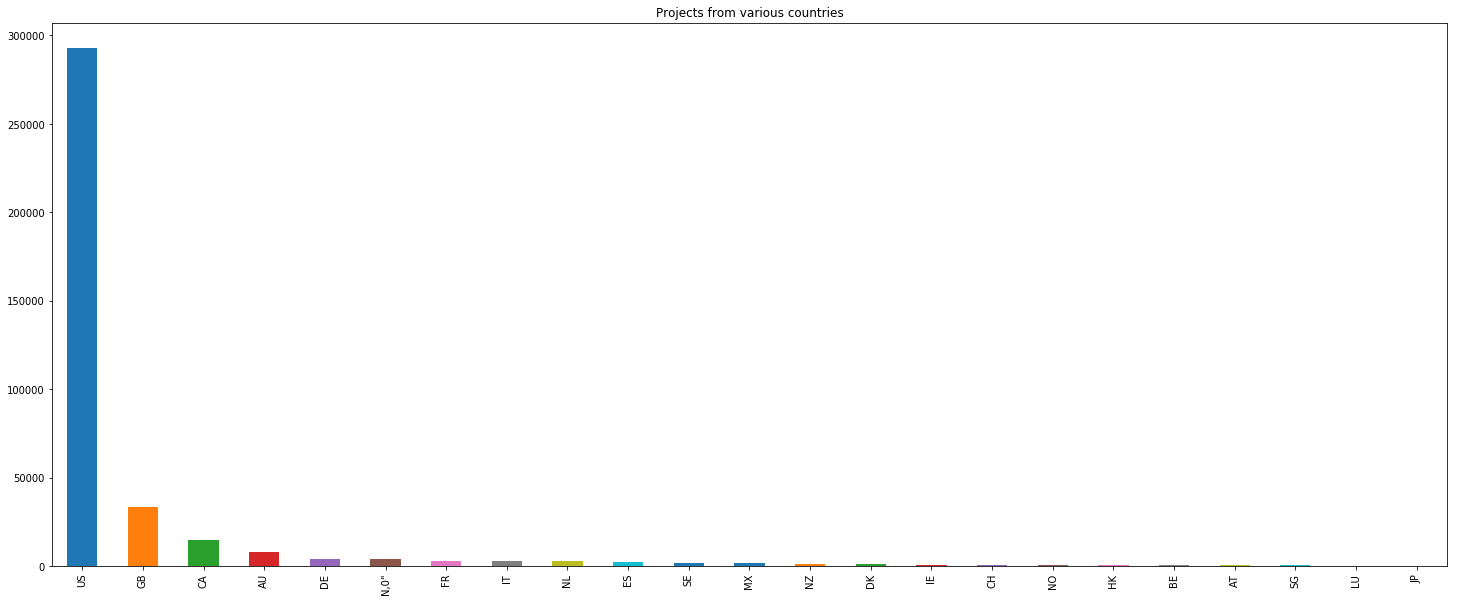

In [10]:
# Lets look at the different countries which have participated
print('Total number of countries are', df['country'].nunique())
df['country'].value_counts()[:23].plot(kind='bar', 
                                       figsize=(25,10), 
                                       title='Projects from various countries')

Total number of categories are 15


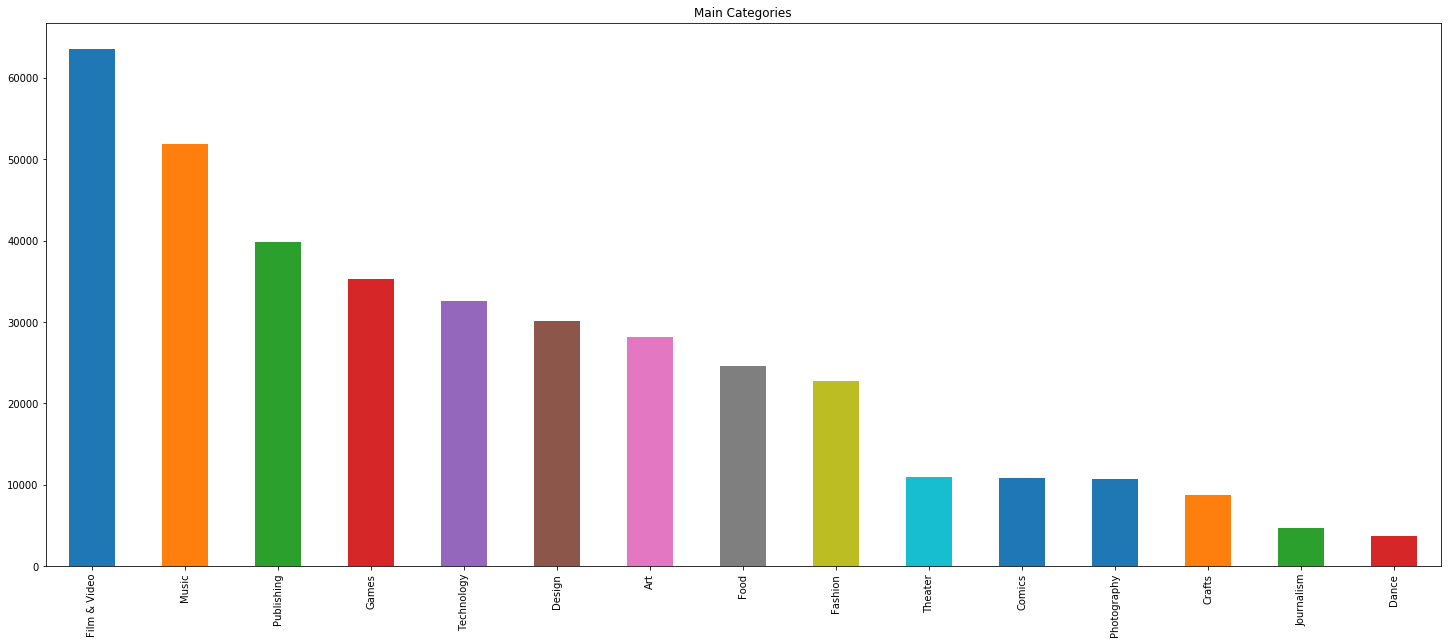

In [11]:
# Lets have a look at categories
print('Total number of categories are', df['main_category'].nunique())

df['main_category'].value_counts().plot(kind='bar', 
                                        figsize=(25,10), 
                                        title='Main Categories')

Total number of currency are 14


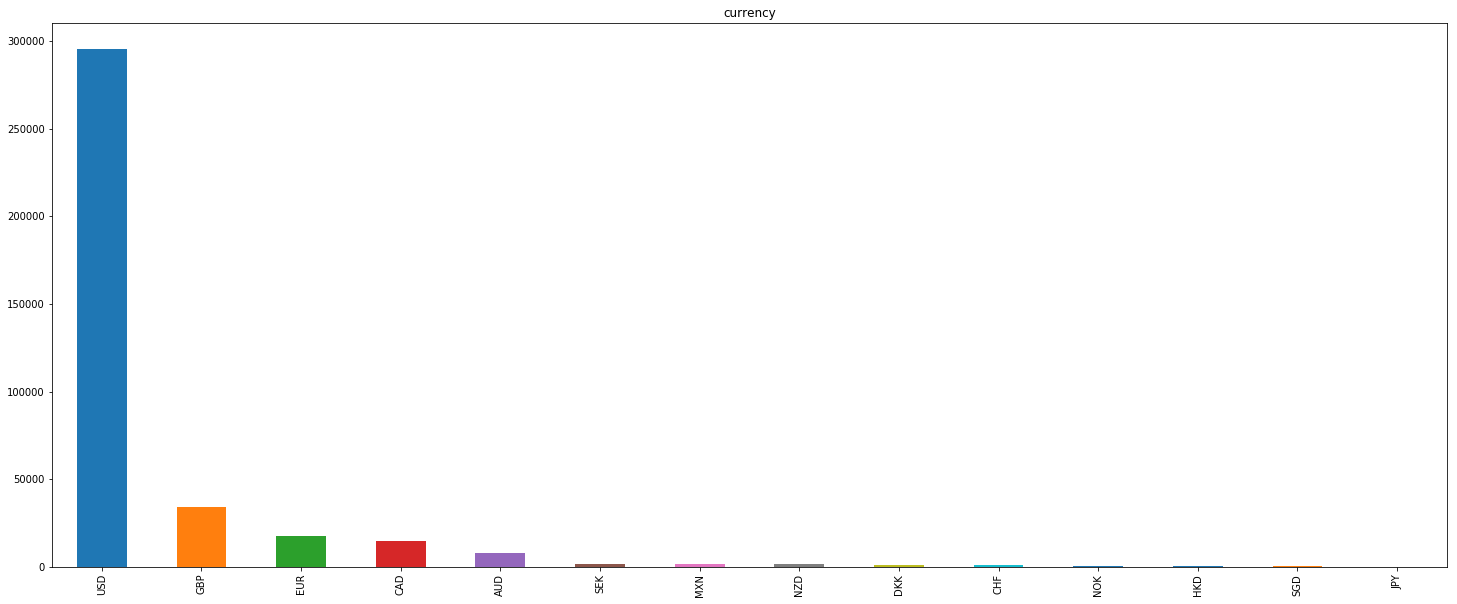

In [12]:
# Lets have a look at currency
print('Total number of currency are', df['currency'].nunique())

df['currency'].value_counts().plot(kind='bar', 
                                        figsize=(25,10), 
                                        title='currency')

In [13]:
# Plotting the pie chart for that
campaign_state = round(df["state"].value_counts() / len(df["state"]) * 100,2)

labels = list(campaign_state.index)
values = list(campaign_state.values)

trace1 = go.Pie(labels=labels, values=values, marker=dict(colors=['red']))

layout = go.Layout(title='Percentage Distribuition of various Campaign States', legend=dict(orientation="h"));

fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [14]:
# We can see most of the campigns were failed
# Lets see how many were successful and how many were failed
#No_sucess = len(df[df['state'] == 'successful']
No_sucess = len(df[df['state'] == 'successful'])
No_failed = len(df[df['state'] == 'failed'])
print('The total number of successful campaigns are',No_sucess)
print('The total number of successful campaigns are',No_failed)


The total number of successful campaigns are 133956
The total number of successful campaigns are 197719


In [15]:
# Lets have a look at the percentage of the campigns failed
print ('{} % of all the campaigns were sucessfull'.format(round(len(df[df['state'] == 'successful']) / len(df) * 100,2)))
print ('{} % of all the campaigns were failed'.format(round(len(df[df['state'] == 'failed']) / len(df) * 100,2)))


35.38 % of all the campaigns were sucessfull
52.22 % of all the campaigns were failed


Total number of states are 6


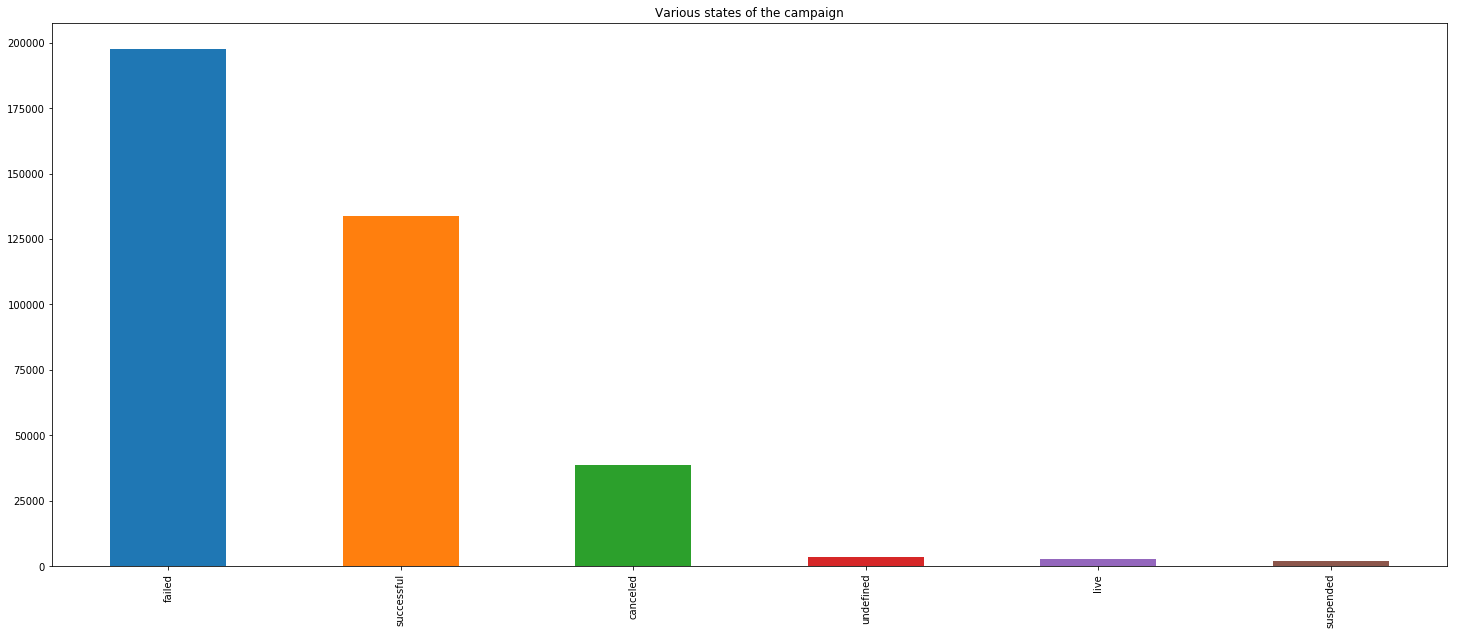

In [16]:
# Lets have a look at differnt states of campaign
print('Total number of states are', df['state'].nunique())

df['state'].value_counts().plot(kind='bar', 
                                        figsize=(25,10), 
                                        title='Various states of the campaign')

# Data prepration

In [17]:
# The goal is to predict the project will be sucessfull or not
# So, we take only the two classes ie: 'successful' or 'failed'

df = df[(df['state'] == 'failed') | (df['state'] == 'successful')].copy()
print(df.shape)

(331675, 15)


In [18]:
# lets see the columns
list(df)

['ID',
 'name',
 'category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'backers',
 'country',
 'usd pledged',
 'usd_pledged_real',
 'usd_goal_real']

In [19]:
# Dropping the colunns
df = df.drop(['ID','name','usd pledged','usd_pledged_real','backers'], 1)
    


In [20]:
list(df)

['category',
 'main_category',
 'currency',
 'deadline',
 'goal',
 'launched',
 'pledged',
 'state',
 'country',
 'usd_goal_real']

In [21]:
df.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,country,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,GB,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,US,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,US,45000.00
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,US,5000.00
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,US,50000.00


In [22]:
# lets start converting dates into numbers so that we can give it to the algorithms 
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['duration_days'] = df['deadline'].subtract(df['launched'])
df['duration_days'] = df['duration_days'].astype('timedelta64[D]')

In [23]:
# lets start converting dates into numbers so that we can give it to the algorithms 
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])
df['duration_days'] = df['deadline'].subtract(df['launched'])
df['duration_days'] = df['duration_days'].astype('timedelta64[D]')

In [24]:
df.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,country,usd_goal_real,duration_days
0,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,GB,1533.95,58.0
1,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,US,30000.00,59.0
2,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,US,45000.00,44.0
3,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,US,5000.00,29.0
5,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,US,50000.00,34.0


In [25]:
# Dropping the old columns
df = df.drop(['launched','deadline','pledged'], 
             1)

In [26]:
df.head()

,category,main_category,currency,goal,state,country,usd_goal_real,duration_days
0,Poetry,Publishing,GBP,1000.0,failed,GB,1533.95,58.0
1,Narrative Film,Film & Video,USD,30000.0,failed,US,30000.00,59.0
2,Narrative Film,Film & Video,USD,45000.0,failed,US,45000.00,44.0
3,Music,Music,USD,5000.0,failed,US,5000.00,29.0
5,Restaurants,Food,USD,50000.0,successful,US,50000.00,34.0


In [27]:
# Now lets start encoding the columns state, country, currency,main_category

In [28]:
# Sucessful :0 and Failed:1
df['state'] = df['state'].map({
    'failed': 0,
    'successful': 1
})

In [29]:
df.head()

,category,main_category,currency,goal,state,country,usd_goal_real,duration_days
0,Poetry,Publishing,GBP,1000.0,0,GB,1533.95,58.0
1,Narrative Film,Film & Video,USD,30000.0,0,US,30000.00,59.0
2,Narrative Film,Film & Video,USD,45000.0,0,US,45000.00,44.0
3,Music,Music,USD,5000.0,0,US,5000.00,29.0
5,Restaurants,Food,USD,50000.0,1,US,50000.00,34.0


In [30]:
# Next is the category and main_category using one hot encoding
df = pd.get_dummies(df, columns = ['category'])
df = pd.get_dummies(df, columns = ['main_category'])


In [31]:

df.head()
df.rename(columns={"main_category_Film & Video": "main_category_Film"}, inplace=True)

In [32]:
list(df)

['currency',
 'goal',
 'state',
 'country',
 'usd_goal_real',
 'duration_days',
 'category_3D Printing',
 'category_Academic',
 'category_Accessories',
 'category_Action',
 'category_Animals',
 'category_Animation',
 'category_Anthologies',
 'category_Apparel',
 'category_Apps',
 'category_Architecture',
 'category_Art',
 'category_Art Books',
 'category_Audio',
 'category_Bacon',
 'category_Blues',
 'category_Calendars',
 'category_Camera Equipment',
 'category_Candles',
 'category_Ceramics',
 "category_Children's Books",
 'category_Childrenswear',
 'category_Chiptune',
 'category_Civic Design',
 'category_Classical Music',
 'category_Comedy',
 'category_Comic Books',
 'category_Comics',
 'category_Community Gardens',
 'category_Conceptual Art',
 'category_Cookbooks',
 'category_Country & Folk',
 'category_Couture',
 'category_Crafts',
 'category_Crochet',
 'category_DIY',
 'category_DIY Electronics',
 'category_Dance',
 'category_Design',
 'category_Digital Art',
 'category_Documenta

In [33]:
# Encoding the currency and country
df = pd.get_dummies(df, columns = ['currency'])
df = pd.get_dummies(df, columns=['country'])

In [34]:
df.head()

,goal,state,usd_goal_real,duration_days,category_3D Printing,category_Academic,category_Accessories,category_Action,category_Animals,category_Animation,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000.0,0,1533.95,58.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,0,30000.00,59.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0,0,45000.00,44.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0,0,5000.00,29.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0,1,50000.00,34.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# Model prepration and splitting data for testing and training

In [36]:
#Lets take out the class for prediction
Y = df['state']

Y.head()

0    0
1    0
2    0
3    0
5    1
Name: state, dtype: int64

In [37]:
#Dropping the state from the dataframe

df = df.drop('state', 1)

In [38]:
# Splitting the data into test dataset and train dataset
X_train, X_test, Y_train, Y_test = train_test_split(
    df,
    Y, 
    test_size = 0.1,
    random_state=42
)

In [39]:
print(X_train.shape, Y_train.shape)

(298507, 214) (298507,)


In [40]:
print(X_test.shape, Y_test.shape)

(33168, 214) (33168,)


In [41]:
# machine learning

In [42]:
# logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
accuracy_log = round(logreg.score(X_test, Y_test) * 100, 2)
#y_pred = logreg.predict(X_test)
#print('\nClassification metrics')
#print(classification_report(y_true=Y_test, y_pred=y_pred))

In [44]:
# Logistic regression accuracy

accuracy_log = round(logreg.score(X_test, Y_test) * 100, 2)
print ('The accuracy for the Logistic regression model is',accuracy_log,"%")

The accuracy for the Logistic regression model is 59.54 %


In [45]:
# K-Nearrest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

accuracy_knn = round(knn.score(X_test, Y_test) * 100, 2)
print ('The accuracy for the K-Nearrest Neighbors model is',accuracy_knn,"%")

The accuracy for the K-Nearrest Neighbors model is 63.11 %


In [46]:
# Support Vector Machine 
# Filed to converge, taking longer time than the remaining algorithms
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

accuracy_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
print ('The accuracy for the SVM model is',accuracy_linear_svc,"%")

The accuracy for the SVM model is 47.59 %


In [47]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

accuracy_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
print ('The accuracy for the Decision Tree model is',accuracy_decision_tree,"%")

The accuracy for the Decision Tree model is 63.65 %


In [48]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

accuracy_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
print ('The accuracy for the Random Forest model is',accuracy_random_forest,"%")

The accuracy for the Random Forest model is 65.24 %


In [51]:
# AdaBoostClassifier
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)

ada_boost.fit(X_train, Y_train)

accuracy_bdt = round(ada_boost.score(X_test, Y_test) * 100, 2)
print ('The accuracy for the AdaBoost model is',accuracy_bdt,"%")

The accuracy for the AdaBoost model is 65.86 %


In [ ]:
# GradientBoostingClassifier
grad_boost = GradientBoostingClassifier(n_estimators=100, 
                                 max_depth=1, 
                                 random_state=0)
grad_boost.fit(X_train, Y_train)

accuracy_grad_boost = round(clf_gb.score(X_test, Y_test) * 100, 2)
print ('The accuracy for the Gradient Boosting model is',accuracy_grad_boost,"%")

In [ ]:
# Multi Laayer perceptron
ml_p = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5, 
                    hidden_layer_sizes=(21, 2), 
                    random_state=1)

ml_p.fit(X_train, Y_train)

accuracy_ml_p = round(mlp.score(X_test, Y_test) * 100, 2)
print ('The accuracy for the Multi Laayer perceptron model is',accuracy_ml_p,"%")

In [ ]:
#LightGBM Classifier
LightGBM = LGBMClassifier(
        n_estimators=300,
        num_leaves=15,
        colsample_bytree=.8,
        subsample=.8,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01
    )

LightGBM.fit(X_train, 
        Y_train,
        eval_set= [(X_train, Y_train), (X_test, Y_test)], 
        eval_metric='auc', 
        verbose=0, 
        early_stopping_rounds=30
       )

accuracy_LightGBM = round(clf_lgbm.score(X_test, Y_test) * 100, 2)
print ('The accuracy for the LightGBM model is',accuracy_LightGBM,"%")